In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import math

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
print('Libraries imported successfully!')

ibmqfactory.load_account:WARNING:2022-02-26 07:42:38,575: Credentials are already in use. The existing account in the session will be replaced.


Libraries imported successfully!


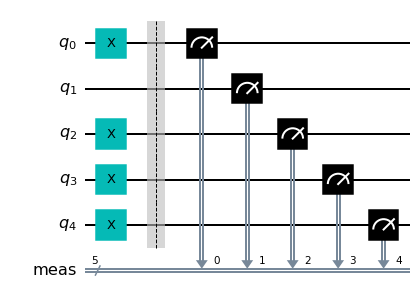

In [117]:
num_of_qubits = 5
qc = QuantumCircuit(num_of_qubits)
qc.x([0,2,3,4])
qc.measure_all()
qc.draw()

In [118]:
shots = 1024

backend = Aer.get_backend('qasm_simulator') # Tell it which simulator you want to use
job = execute(qc,backend, shots = shots) # Put in the name of your quantum circuit where it says qc, and the number of shots you want to use
result = job.result()

counts = result.get_counts()
print(counts)
#plot_histogram(counts)

{'11101': 1024}


<b> Please note the following: </b>
<b>key</b> is the output vector of the quantum generator, and it must be as an integer in Big Endian format. 
Remember Qiskit simulator outputs in Little Endian format.

In [119]:
key = list(counts.keys())[list(counts.values()).index(shots)]
key = int(key[::-1])
key

10111

In [120]:
def binaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal  

In [121]:
distance = binaryToDecimal(key)/(2**(num_of_qubits-2))
distance

2.875